<a href="https://colab.research.google.com/github/StevenXDiaz/AstroPersonalWebsite/blob/main/PSET_6_MS%26E233_Spring2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MS&E 233 (Spring 2025): Homework 6 (due May 25th, 8pm)

# Problem 1. First and Second Price Auction with $n$ symmetric bidders.

As proved in [Lecture 9](https://raw.githubusercontent.com/stanford-msande233/spring24/master/assets/presentations/Lecture9.pdf) the Bayes Nash Equilibirium strategy for a first price auction with $n$ symmetric bidders whose values follow the distribution $v_i \sim U[0,1]$ is:
\begin{align}
s_i(v_i) = \left( 1 - \frac{1}{n} \right) v_i
\end{align}
More generally, one can show that for any distribution $F$, if the bidders values are all drawn independently from this distribution, then the unique symmetric equilibrium is that each bidder bids:
\begin{align}
s_i(v_i) = E_{v_{-i}\sim F^{n-1}}[\max_{j\neq i} v_j\mid \max_{j\neq i} v_j < v_i]
\end{align}
In other words, each person bids what they expect the second highest bid will be, conditional on the event that the second highest bid is below their value.

We also discussed in lecture 11 how a second price auction is Dominant Strategy Incentive Compatible (DSIC) and that the equilibrium strategy was to bid your value.

Below we explore the expected revenue of these two auctions under a symmetric equilibria.

## Bonus Problem (Not Graded; can help you in better understanding equilibrium computation)

You don't need to solve this problem and it wont be graded, but feel free to try it out. Verify that the following is always an equilibrium for the first price auction among symmetric bidders:
\begin{align}
s_i(v_i) = E_{v_{-i}\sim F^{n-1}}[\max_{j\neq i} v_j\mid \max_{j\neq i} v_j < v_i]
\end{align}

# **(Place your answer here)**

## Problem 1.1. Expected Revenue in First Price (FPA) and Second Price (SPA) for U[0,1]

Below you will calculate the average revenue for the auctioneer across many simulations of each auction, when bidders follow their respective equilibrium strategies. In this first setting, bidders have values distributed $U[0,1]$. So you can use the simple equilibrium characterization.

In [1]:
import numpy as np

def simulate_auctions_uniform(n_samples, n_bidders):
    ''' (0.5 points)
    n_samples: number of simulations
    n_bidders: number of bidders
    '''
    # generate valuation profiles for each auction simulation and for
    # each bidder within the simulation
    values = np.random.uniform(0, 1, size=(n_samples, n_bidders))
    # calculate the bids for each bidder in a FPA based on their values
    fpa_bids = (n_bidders - 1) / n_bidders * values

    # calculate the bids for each bidder in a FPA based on their values
    spa_bids = values

    # based on the FPA bids, calculate the revenue of each auction simulation
    # and the average revenue across auction simulations
    fpaRev = np.mean(np.max(fpa_bids, axis=1))

    # similarly for the SPA auction
    spaRev = np.mean(np.sort(spa_bids, axis=1)[:, -2])

    return fpaRev, spaRev

In [2]:
# Perform simulation
np.random.seed(123)
n_samples = 10000
n_bidders = 5
fpaRev, spaRev = simulate_auctions_uniform(n_samples, n_bidders)

print(f"Expected revenue for first price auction: {fpaRev:.3f}")
print(f"Expected revenue for second price auction: {spaRev:.3f}")

Expected revenue for first price auction: 0.667
Expected revenue for second price auction: 0.668


**Expected results.** You should be getting answers, approximately:
```
Expected revenue for first price auction: 0.667
Expected revenue for second price auction: 0.668
```

## Problem 1.2 Expected Revenue in First Price (FPA) and Second Price (SPA) for General F

We will now calculate revenues in the general case. In this case, we need to calculate the equilibrium strategy under an FPA, i.e.
\begin{align}
s_i(v_i) = E_{v_{-i}\sim F^{n-1}}[\max_{j\neq i} v_j\mid \max_{j\neq i} v_j < v_i]
\end{align}
For every value $v_i$, we will use the Bayes-rule to write:
\begin{align}
s_i(v_i) = \frac{E_{v_{-i}\sim F^{n-1}}[\max_{j\neq i} v_j \cdot {\bf 1}\{\max_{j\neq i} v_j < v_i\}]}{\Pr_{v_{-i}\sim F^{n-1}}(\max_{j\neq i} v_j < v_i)}
\end{align}
Then we will approximate the numerator and denominator by drawing $m$ samples of opponent values and calculating the empirical versions these expectations and probabilities, i.e.
\begin{align}
s_i(v_i) = \frac{\frac{1}{m}\sum_{t=1}^m  \max_{j\neq i} v_j^t \cdot {\bf 1}\{\max_{j\neq i} v_j^t < v_i\}}{\frac{1}{m}\sum_{t=1}^m {\bf 1}\{\max_{j\neq i} v_j^t < v_i\}}
\end{align}
where each $v_j^t$ is drawn independently form $F$.

As an example, we will use as $F$, the chi-squared distribution $\chi^2(1)$, i.e. the square of a normal distribution.

In [5]:
import numpy as np

def gen_values(n_samples, n_bidders):
    return np.random.normal(0, 1, size=(n_samples, n_bidders))**2

def fpa_strategy(v, n_bidders):
    '''(1.0 points)'''
    other_values = gen_values(1000000, n_bidders - 1)

    max_other_value = np.max(other_values, axis=1)

    prob_win = np.mean(max_other_value < v)

    if prob_win == 0:
        return 0

    return np.sum(max_other_value[max_other_value < v]) / (1000000 * prob_win)


def fpa_strategy_on_grid(vgrid, n_bidders):
    return np.array([fpa_strategy(v, n_bidders) for v in vgrid])

We will now plot the bid of a player as a function of their value on a grid of values in the interval [0, 20]

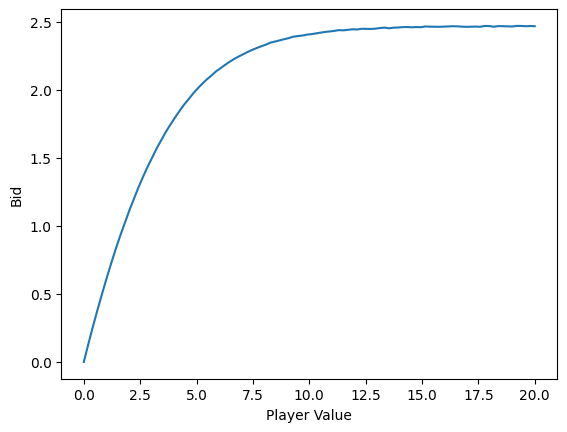

In [6]:
import matplotlib.pyplot as plt
np.random.seed(123)
vgrid = np.linspace(0, 20, 100)
fpa_strategies_grid = fpa_strategy_on_grid(vgrid, 5)
plt.plot(vgrid, fpa_strategies_grid)
plt.xlabel('Player Value')
plt.ylabel('Bid')
plt.show()

**Expected results.** You should be getting an image like this:

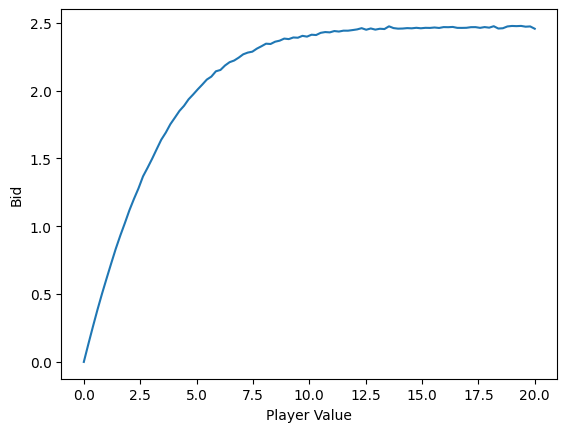

We will now simulate the two auctions many times and calculate the average revenues. For the first price auction, to expedite calculation of the equilibrium bids across all samples, we will first calculate the equilibrium bid for a grid of values in the interval $[0,20]$. Then for any value of a bidder, we will find the closest bid in the grid and return the corresponding pre-calculated bid for that grid point.

In [9]:
def simulate_auctions_general_F(n_samples, n_bidders):
    '''(1.0 points)'''
    values = gen_values(n_samples, n_bidders)

    # calculate the equilibrium bids in FPA for a grid of values
    vgrid = np.linspace(0, 20, 100)
    fpa_strategies_grid = fpa_strategy_on_grid(vgrid, n_bidders)

    # bids of players in FPA
    fpa_bids = np.zeros((n_samples, n_bidders))
    for i in range(n_bidders):
        # for each auction simulation t, find the index of the value
        # in vgrid that is closest to bidder i's value at simulation t.
        dists = np.abs(values[:, i, None] - vgrid[None, :])

        closest_ind = np.argmin(dists, axis=1)
        # for each auction simulation t, set as bidder i's bid the FPA
        # equilibrim bid that corresponds to that closest grid point
        fpa_bids[:, i] = fpa_strategies_grid[closest_ind]

    # bids of players in SPA
    spa_bids = values

    # based on the FPA bids, calculate the revenue of each auction simulation
    # and the average revenue across auction simulations
    fpaRev = np.mean(np.max(fpa_bids, axis=1))

    # similarly for the SPA auction]
    spaRev = np.mean(np.sort(spa_bids, axis=1)[:, -2])

    return fpaRev, spaRev

In [10]:
np.random.seed(123)
n_bidders = 5
n_samples = 1000000
fpaRev, spaRev = simulate_auctions_general_F(n_samples, n_bidders)

print(f"Expected revenue for first price auction: {fpaRev:.3f}")
print(f"Expected revenue for second price auction: {spaRev:.3f}")

Expected revenue for first price auction: 1.256
Expected revenue for second price auction: 1.257


**Expected results.** You should be getting values, approximately
```
Expected revenue for first price auction: 1.256
Expected revenue for second price auction: 1.257
```

## Problem 1.3. Analysis of experiment
Comment on the average revenue from each auction, in particular describe the differences/similarities between the two and why this is the case. (0.5 points)

# **(Put Answer Here)**

Because of Revenue Equivalence Theorem, the average revenues from each auction are about the same. The ways that the different bidders act is a bit different in the two experiments anyways, but the conditions for the above stated theorem are met, so these results make sense.

# Problem 2. Optimal and Approximately Optimal Auctions

In this problem we'll be exploring the revenue of Myerson's optimal auction, as well as the revenue of approximately optimal auctions that should be competing with Myerson's auction, such as the second price auction with personalized and non-personalized reserve prices.

We will consider a setting with two bidders. Bidder 1 has values distributed as $v_1\sim U[0, 15]$ and bidder 2 has values distributed as $v_2\sim U[0, 20]$.






## Problem 2.1. Characterize Myerson's Optimal Auction

In Lecture 11 we began describing the virtual values and in Leture 12, we examined Myerson's optimal auction. If a player's value $v_i \sim F_i$ where $F_i$ is the cummulative density function and $f_i$ is the probability density function of the distribution of the bidder's value.
\begin{align}
\phi_i(v_i) = v_i - \frac{1-F_i(v_i)}{f_i(v_i)}
\end{align}.


Below calculate $\phi_1(v)$ and $\phi_2(v)$ for each bidder and determine the Myerson optimal auction rules for Myerson's optimal auction, similar to the slides 38-44 of [Lecture 12](https://raw.githubusercontent.com/stanford-msande233/spring24/master/assets/presentations/Lecture12.pdf).

(1 point)

# **(Put your answer here)**

Given bidder distributions and properties of uniform distributions, we know

phi(v_1) = v_1 - (1 - F_1(v_1))/(f_1(v_1)) = v_1 - (15 - v_1) = 2v_1 - 15

and therefore

phi(v_2) = v_2 - (20 - v_2) = 2v_2 - 20

## Problem 2.2 Implement Myerson's Optimal Auction

Now implemene the auction rules and calculate the expected revenue by simulating many auctions.

In [30]:
def simulate_myerson(n_samples):
    ''' (1.0 points)
    n_samples: number of simulations of the auction
    '''
    rev = 0
    v1 = np.random.uniform(0, 15, size=n_samples)
    v2 = np.random.uniform(0, 20, size=n_samples)

    for t in range(n_samples):
        # Implement the Myerson auction rules using values v1[t], v2[t],
        # based on your characterization in Prolbem 2.1
        # i.e. implement each case scenario and increment the value rev by the
        # revenue in the t-th simulation of the auction.

        phi_1 = 2 * v1[t] - 15
        phi_2 = 2 * v2[t] - 20

        if phi_1 < 0 and phi_2 < 0:
          continue
        elif phi_1 >= phi_2 and phi_1 >= 0:
          if phi_2 >= 0:
            price = max(v2[t] - 2.5, 7.5)
          else: price = 7.5
        elif phi_2 > phi_1 and phi_2 >= 0:
          if phi_1 >= 0:
            price = max(v1[t] + 2.5, 10)
          else: price = 10

        rev += price


    rev = rev / n_samples
    return rev

In [31]:
np.random.seed(123)

rev = simulate_myerson(10000)
print(f'Optimal Revenue={rev:.3f}')

Optimal Revenue=7.366


**Expected results.** You should be getting values, approximately
```
Optimal Revenue=7.366
```

## Problem 2.3 Implement Second-Price with Player-Specific Reserves

Implement the Second Price Auction with Player-Specific Reserves, described in Slide 49 of [Lecture 12](https://raw.githubusercontent.com/stanford-msande233/spring24/master/assets/presentations/Lecture12.pdf).

In particular
1. Each bidder $i$ has a reserve price $r_i$
2. Reject all bidders with bid below the reserve
3. Among all bidders with value $v_i \geq r_i$ allocate to highest bidder
4. Charge winner max of their reserve and the next highest non-rejected bid

We will implement this auction only for the special case of two bidders and arbitrary reserve prices $r_1, r_2$.


In [32]:
def simulate_non_identical_spa_with_reserves(n_samples, r1, r2):
    ''' (1.0 points)
    n_samples: number of simulations of the auction
    r1, r2: reserve prices for each bidder
    '''
    rev = 0
    v1 = np.random.uniform(0, 15, size=n_samples)
    v2 = np.random.uniform(0, 20, size=n_samples)

    for t in range(n_samples):
        # Implement the SPA with personalized reserve auction rules
        # using values v1[t], v2[t] and increment the value rev by the revenue
        # in the t-th simulation of the auction.
        over_reserve_1 = v1[t] >= r1
        over_reserve_2 = v2[t] >= r2

        if not over_reserve_1 and not over_reserve_2:
          continue
        if over_reserve_1 and (v1[t] > v2[t] or not over_reserve_2):
          if over_reserve_2:
            rev += max(v2[t], r1)
          else:
            rev += r1
        elif over_reserve_2:
          if over_reserve_1:
            rev += max(v1[t], r2)
          else:
            rev += r2


    rev = rev / n_samples
    return rev

In [33]:
np.random.seed(123)

rev = simulate_non_identical_spa_with_reserves(10000, 5, 10)
print(f'Revenue={rev:.3f}')

Revenue=7.044


**Expected results.** You should be getting values, approximately
```
Revenue=7.044
```

## Problem 2.4 Calculating the Player-Specific Reserves Implied by Prophet Inequality

Recall that in slides 50-57 of [Lecture 12](https://raw.githubusercontent.com/stanford-msande233/spring24/master/assets/presentations/Lecture12.pdf), we proved that there always exist a set of personalized reserve prices that achieve revenue at least half of Myerson's optimal auction revenue. In particular, on slide 57, we gave the recipe for how to set these reserve prices.

Let $\phi_1^+(v_1)=\max\{0, \phi_1(v_1)\}$ and $\phi_2^+(v_2)=\max\{0, \phi_2(v_2)\}$, where $\phi_i(v_i)$ are the virtual value functions you calculated in Problem 3.1. Then we need to find a threshold $\theta$, such that:
\begin{equation}
Pr_{v_1\sim F_1, v_2\sim F_2}[\max\{\phi_1^+(v_1), \phi_2^+(v_2)\} > \theta] \approx 1/2
\end{equation}
We will find such a $\theta$ by drawing $m$ samples $(v_1, v_2)\sim (F_1, F_2)$ and calculating for each theta the empirical probability:
\begin{align}
\pi(\theta) := \frac{1}{m}\sum_{t=1}^m {\bf 1}\{\max\{\phi_1^+(v_1^t), \phi_2^+(v_2^t)\} > \theta\}
\end{align}
Then we will do a grid-search over the values of $\theta$ in the interval $[0, 20]$ and find a $\theta$ such that $\pi(\theta)\approx 0.5$

Then we will set the reserve prices $r_1, r_2$, by finding the solutions to equations:
\begin{align}
\phi_1^+(r_1) = \theta\\
\phi_2^+(r_2) = \theta
\end{align}

In [39]:
def calculate_prophet_inequality_threshold(n_samples = 10000):
    ''' (1.0 points) '''
    np.random.seed(123)
    # sample n_samples draws of v1, v2
    v1 = np.random.uniform(0, 15, size=n_samples)
    v2 = np.random.uniform(0, 20, size=n_samples)

    # calculate phi_1^+ and phi_2^+
    phi1plus = np.maximum(2 * v1 - 15, 0)
    phi2plus = np.maximum(2 * v2 - 20, 0)
    phiplus = np.stack([phi1plus, phi2plus], axis=1)

    for theta in np.arange(0, 20, 0.01):
        # Calculate pi(theta), i.e. the empirical probability that
        # max(phi_1^+, phi_2^+) lies above theta.
        prob = np.mean(np.max(phiplus, axis=1) > theta)

        if np.isclose(prob, 0.5, atol=0.01):
            break

    return theta, prob

In [40]:
theta, prob = calculate_prophet_inequality_threshold()
print(f'theta={theta:.3f}, pi(theta)={prob:.3f}')

theta=6.780, pi(theta)=0.510


**Expected results.** You should be getting values, approximately
```
theta=6.780, pi(theta)=0.510
```

In [41]:
def calculate_prophet_inequality_reserves(n_samples = 10000):
    ''' (0.5 points) '''
    theta, prob = calculate_prophet_inequality_threshold(n_samples)

    # find the personalized reserve prices r1, r2 that correspond
    # to the threshold theta
    r1 = (theta + 15) / 2

    r2 = (theta + 20) / 2

    return r1, r2


In [42]:
r1, r2 = calculate_prophet_inequality_reserves()
print(f'r1={r1:.3f}, r2={r2:.3f}')

r1=10.890, r2=13.390


**Expected results.** You should be getting values, approximately
```
r1=10.890, r2=13.390
```

In [43]:
np.random.seed(123)

rev = simulate_non_identical_spa_with_reserves(10000, r1, r2)
print(f'Revenue={rev:.3f}')

Revenue=6.402


**Expected results.** You should be getting values, approximately
```
Revenue=6.402
```

Comment on whether your result verifies the approximation guarantee we proved in class. Is the revenue better than the worst-case guarantee or close to the worst-case guarantee. (0.5 points)

# **(Put your answer here)**

Yes it does verify what we disucssed in class. The myerson algorithm gave a much smaller optimal revenue value than than the prophet auction, much more different than our 0.5 approximation bound states.

## Problem 2.5 Optimize over the Personalized Reserves

Now search over a grid for each of the reserve prices $r_1, r_2$ and find the value of these reserve prices, such that the SPA auction with these personalized reserves, has the highest revenue.

In [44]:
def calculate_optimal_personalized_reserves_grid(n_samples = 10000):
    ''' (0.5 points) '''
    np.random.seed(123)

    best_rev = 0
    best_r1 = 0
    best_r2 = 0
    for r1 in np.linspace(0, 15, 20):
        for r2 in np.linspace(0, 20, 20):
            rev = simulate_non_identical_spa_with_reserves(n_samples, r1, r2)

            if rev > best_rev:
                best_r1, best_r2, best_rev = r1, r2, rev
    return best_r1, best_r2, best_rev

In [45]:
best_r1, best_r2, best_rev = calculate_optimal_personalized_reserves_grid()
print(f'r1={best_r1:.3f}, r2={best_r2:.3f}, rev={best_rev:.3f}')

r1=7.105, r2=10.526, rev=7.266


**Expected results.** You should be getting values, approximately
```
r1=7.105, r2=10.526, rev=7.266
```

Comment how the optimal personalized reserve prices compare to the reserve prices driven by the theoretical prophet inequality result. Are they higher reserve prices or lower reserve prices. Do they achieve much higher revenue? (0.5 points)

# **(Put your answer here)**

The optimal reserves that we found are lower than the theoretical and also give us higher revenues than the theoretical. Optimizing reserve prices directly therefore does increase performance greatly.

## Problem 2.6. Monopoly Reserve Prices

In lecture 12 we examined the notion of the optimal monopoly reserve $\eta_i$, that a seller would offer to a bidder if they were alone in the auction is characterized by finding the solution to the equation:
\begin{align}
\eta_i - \frac{1 - F_i(\eta_i)}{f_i(\eta_i)} = 0
\end{align}

Using this formula find the monopoly reserve prices for each of the two bidders (i.e. when $v_1\sim U[0,15]$ and $v_2\sim U[0, 20]$). Are these reserve prices closer to the optimal personalized reserves that you computed in the previous section, than the reserve prices you found using the Prophet Inequality approach? (0.5 points)

# **(Put your answer here)**

F_1(n_1) = n_1/15 , f_1(n_1) = 1/15 , F_2(n_2) = n_2/20 , f_2(n_2) = 1/20


Using the above and the given formula and solving,

we get

n_1 = 7.5
n_2 = 10


We see thaty the monopoly reserve prices are, in fact, closer to optimal personalized reserves than Prophet Inequality approach.

Now calculate the revenue of the Second-Price Auction with Player Specific reserves, where the reserve price of each bidder is set to be equal to their monopoly reserve.

In [46]:
def calculate_monopoly_reserves(n_samples = 10000):
    ''' (0.5 points) '''
    np.random.seed(123)

    eta1 = 7.5

    eta2 = 10

    rev = simulate_non_identical_spa_with_reserves(n_samples, eta1, eta2)

    return rev, eta1, eta2

In [47]:
rev, eta1, eta2 = calculate_monopoly_reserves()
print(f'Revenue: {rev:.3f}')

Revenue: 7.250


**Expected results.** You should be getting values, approximately
```
Revenue: 7.250
```

## Problem 2.7 Second Price with the Same Reserve

Now examine if an approximately optimal revenue can also be achieved if we used the same reserve price for both bidders. We find the optimal such single reserve price via grid search.

In [48]:
def calculate_optimal_spa_single_reserve(n_samples = 10000):
    ''' (0.5 points) '''
    np.random.seed(123)

    best_rev = 0
    best_r = 0
    for r in np.linspace(0, 20, 20):
        rev = simulate_non_identical_spa_with_reserves(n_samples, r, r)

        if rev > best_rev:
            best_r, best_rev = r, rev
    return best_r, best_rev


In [49]:
best_r, best_rev = calculate_optimal_spa_single_reserve()
print(f'r={best_r:.3f}, rev={best_rev:.3f}')

r=8.421, rev=7.172


**Expected results.** You should be getting values, approximately
```
r=8.421, rev=7.172
```

Comment on how does the optimal single reserve price compares to the personalized reserve prices you calculated in the previous problems. Comment on whether the revenue achieved is close to the revenue achieved by personalized reserves. (0.5 points)

# **(Put your answer here)**

Optimal single reserve price falls between our personalized reserve vals Resulting revenue is a bit lower than achieved with personalized reserves, but it's still quite close, so uniform reserve still performs fairly well in comparison to others.